# Import Data Set

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("NewspaperData.csv")
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [2]:
data.size


102

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


# Correlation

In [4]:
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


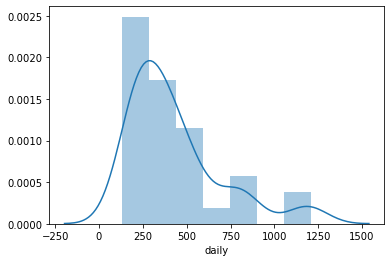

In [5]:
import seaborn as sns
sns.distplot(data['daily'])

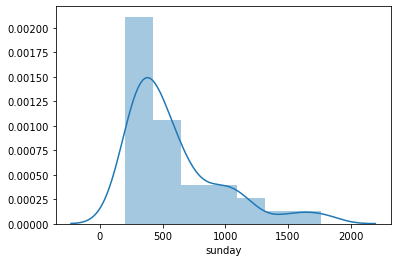

In [6]:
import seaborn as sns
sns.distplot(data['sunday'])

Fitting a Linear Regression Model

In [7]:
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data = data).fit()

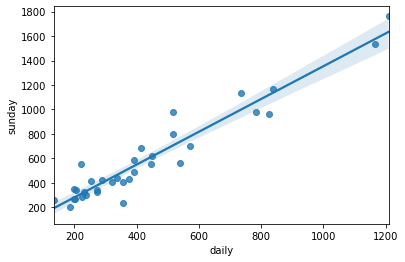

In [8]:
sns.regplot(x="daily", y="sunday", data=data);

In [9]:
model.predict(data)

0      538.939509
1      706.442705
2      490.275710
3      333.431284
4      734.307432
5      996.884826
6      280.213795
7      352.279731
8      290.090172
9      323.546868
10     616.379041
11     400.438457
12     262.668890
13    1573.783417
14     609.447357
15     566.965002
16     378.613164
17    1061.219269
18    1633.852208
19    1119.786239
20     313.594128
21     489.224034
22     704.489401
23     309.195844
24     466.219792
25     277.920203
26     192.337885
27     514.901007
28     380.708478
29     777.960698
30     538.047259
31     284.270451
32     444.722729
33    1137.725020
dtype: float64

In [10]:
#Coefficients
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [11]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [12]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

# Predict for new data point

In [13]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300])

In [14]:
data_pred=pd.DataFrame(newdata,columns=['daily'])
data_pred

,daily
0,200
1,300


In [15]:
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64

In [16]:
xyz=data.iloc[:,1]

In [17]:
xyz

0      391.952
1      516.981
2      355.628
3      238.555
4      537.780
5      733.775
6      198.832
7      252.624
8      206.204
9      231.177
10     449.755
11     288.571
12     185.736
13    1164.388
14     444.581
15     412.871
16     272.280
17     781.796
18    1209.225
19     825.512
20     223.748
21     354.843
22     515.523
23     220.465
24     337.672
25     197.120
26     133.239
27     374.009
28     273.844
29     570.364
30     391.286
31     201.860
32     321.626
33     838.902
Name: daily, dtype: float64

In [18]:
x=model.predict(xyz)

In [19]:
x

0      538.939509
1      706.442705
2      490.275710
3      333.431284
4      734.307432
5      996.884826
6      280.213795
7      352.279731
8      290.090172
9      323.546868
10     616.379041
11     400.438457
12     262.668890
13    1573.783417
14     609.447357
15     566.965002
16     378.613164
17    1061.219269
18    1633.852208
19    1119.786239
20     313.594128
21     489.224034
22     704.489401
23     309.195844
24     466.219792
25     277.920203
26     192.337885
27     514.901007
28     380.708478
29     777.960698
30     538.047259
31     284.270451
32     444.722729
33    1137.725020
dtype: float64

In [20]:
y=data.iloc[:,2]-x

In [21]:
y

0     -50.433509
1      91.855295
2    -255.191710
3     -33.980284
4    -175.214432
5     136.364174
6      68.530205
7      65.499269
8      54.431828
9      -0.462868
10      4.372959
11     22.866543
12    -60.054890
13    -42.256417
14    -55.968357
15    119.009998
16    -54.372164
17    -77.979269
18    128.162792
19   -159.478239
20    -28.983128
21    -81.464034
22    278.173599
23    247.804156
24    -25.296792
25     -9.860203
26     69.710115
27    -82.399007
28    -42.353478
29    -73.638698
30     47.633741
31    -16.489451
32    -36.379729
33     27.841980
dtype: float64